In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### (1) 데이터 로드 및 확인

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 취홍_전처리.csv to 취홍_전처리 (1).csv


In [ ]:
review = pd.read_csv('취홍_전처리.csv', sep = ',')
review

,Unnamed: 0,category,store,id,review_spell_check,star
0,0,중식,취홍,ka**님,삼선 볶음밥에 짜장 소스를 넣은 건지 만 건지 너무 조금이길래 아 실수로 이렇게 보...,1
1,1,중식,취홍,ja**님,,5
2,2,중식,취홍,qk**님,머야 이거 너무 맛있잖아요 책임져요,5
3,3,중식,취홍,we**님,지난번에는 맛있게 먹었는데 이번엔 유린기가 좀 퍽퍽하다고 해야 하나 혹시 주방장님...,3
4,4,중식,취홍,re**님,간짜장이 떡졌어요 짜장 양념을 너무 모자라게 줘서 면발이 잘 비벼지지도 않고 이런 ...,3
...,...,...,...,...,...,...
1897,1995,중식,취홍,ll**님,꺅 치졸 짬뽕 개운함 짜장도 괜찮음,5
1898,1996,중식,취홍,si**님,배달이 조금 느렸지만 무난했어요,4
1899,1997,중식,취홍,va**님,너무 맵지 않게 해달라고 꼭 부탁드렸는데 완전히 부을 짬뽕이 와서 하나도 못 먹고 ...,4
1900,1998,중식,취홍,ra**님,항상 제값하는 집 난 진짜 여기서만 시킨다 진심 이 집 괜찮음,5


- 결측치 확인 및 추가 제거

In [ ]:
review.isnull().sum() # NULL 값 유무 확인

Unnamed: 0             0
category               0
store                  0
id                     0
review_spell_check    15
star                   0
dtype: int64

In [ ]:
review = review.dropna(axis=0) # NULL 값이 있는 행 제거
print(review.isnull().sum()) # NULL 값 유무 재확인

Unnamed: 0            0
category              0
store                 0
id                    0
review_spell_check    0
star                  0
dtype: int64


In [ ]:
# 데이터 확인
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 1901
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1887 non-null   int64 
 1   category            1887 non-null   object
 2   store               1887 non-null   object
 3   id                  1887 non-null   object
 4   review_spell_check  1887 non-null   object
 5   star                1887 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 103.2+ KB


### (2) 한국어 텍스트 처리

In [ ]:
# 분석에 필요한 변수만 불러오기
review_data = review.loc[:, ["review_spell_check", "star"]]
review_data

,review_spell_check,star
0,삼선 볶음밥에 짜장 소스를 넣은 건지 만 건지 너무 조금이길래 아 실수로 이렇게 보...,1
1,,5
2,머야 이거 너무 맛있잖아요 책임져요,5
3,지난번에는 맛있게 먹었는데 이번엔 유린기가 좀 퍽퍽하다고 해야 하나 혹시 주방장님...,3
4,간짜장이 떡졌어요 짜장 양념을 너무 모자라게 줘서 면발이 잘 비벼지지도 않고 이런 ...,3
...,...,...
1897,꺅 치졸 짬뽕 개운함 짜장도 괜찮음,5
1898,배달이 조금 느렸지만 무난했어요,4
1899,너무 맵지 않게 해달라고 꼭 부탁드렸는데 완전히 부을 짬뽕이 와서 하나도 못 먹고 ...,4
1900,항상 제값하는 집 난 진짜 여기서만 시킨다 진심 이 집 괜찮음,5


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 1901
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_spell_check  1887 non-null   object
 1   star                1887 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.2+ KB


In [ ]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(review_spell_check):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangul.sub('', review_spell_check)  # 위에 설정한 "hangul"규칙을 "review_spell_check"에 적용(.sub)시킴
    return result

In [ ]:
apply_regular_expression(review_data['review_spell_check'][118]) # 확인

'가격대가 합리적이고 다른 곳보다 맛도 좋았습니다'

- 형태소 분석 - 명사 단위

In [ ]:
# 형태소 분석에 필요한 라이브러리 Konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from collections import Counter

# 명사 형태소 추출 함수
okt = Okt()
kkma = Kkma()
hannanum = Hannanum()

In [ ]:
# okt 채택
nouns = okt.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns

['가격', '대가', '합리', '다른', '곳', '맛']

In [ ]:
nouns2 = kkma.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns2

['가격', '가격대', '대', '합리적', '곳', '맛']

In [ ]:
nouns3 = hannanum.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns3

['가격대', '합리적', '곳', '맛']

In [ ]:
# 말뭉치 생성
corpus = "".join(review_data['review_spell_check'].tolist())
corpus

'삼선 볶음밥에 짜장 소스를 넣은 건지 만 건지 너무 조금이길래 아 실수로 이렇게 보내신 것 같은데 짜장 소스가 너무 적게 왔네요 저희 원래 짜장 소스 쪼금 나가는데요 원래 쪼끔 나가요 정량이 그래요 맞게 간 거예요 너무 당당해서 할 말을 잃었네요 번창하세요 ps 발뺌할 생각 마세요 녹취 다 있습니다       머야 이거 너무 맛있잖아요 책임져요지난번에는 맛있게 먹었는데 이번엔 유린기가 좀 퍽퍽하다고 해야 하나  혹시 주방장님이 바뀌셨나간짜장이 떡졌어요 짜장 양념을 너무 모자라게 줘서 면발이 잘 비벼지지도 않고 이런 건조한 짜장면은 처음 먹어보네요 양념 양을 많이 달라는 게 아니고 기본 정량은 주셔야죠맛있게 잘 먹었습니다맛은 사실 보류이긴 한데 밤이 시켰긴 하나 면발이 통째로 들리고 살다 살다 이렇게 떡진 짜장면 처음 봤습니다 웬만하면 비비고 풀면서 양념이 배는데 이건 양념이 면발에 안 배여서 비비는 데 한 10분 나중에 가위로 잘랐어요 칠리새우 튀김옷이랑 새우랑 따로 노는데 다음에 점심때 한 번 더 시켜 먹어보려고 합니다 새우도 그렇고 면발도 그렇고 점심때 만들다 남은 거 그대로 가져다준 느낌이라서 점심때 진짜 만든 직후 음식 먹어보고 평가하려고 합니다 갓 만든 상태였으면 짜장면 칠리 새우다 괜찮았을 것 같아요짜장면은 최고 탕수육 고기 안 익어 씹다 뱉음차돌 짬뽕 정말 제가 먹어본 짬뽕 중에는 제일 맛있네요간짜장 맛있게 잘 먹었습니다맛있게 잘 먹었습니다늘 시키는 곳 배신하지 않는 맛이네요 조금 면이 불어왔지만 완공 너무 맛있어요잘 먹었습니다5층까지 배달 주시느라 노고 많으셨어요 그리고 맛있는 음식을 든든하게 잘 먹었습니다 특히 일호 용품이 아니어서 좋았어요 자주 애용하겠습니다맛있게 잘 먹었습니다지난번 주문에 너무 맛있게 먹어 재주문 했습니다 배달 예상시간보다 25분이나 빨리 와 웬일이냐고 행운이라고 생각했는데 면은 다 불고 탕수육은 완전 눅눅함 그 자체 이게 뭔가요 여기 이렇게 장사하는 건가요 지난번 너무 맛있어  급하게 먹느라 사진을 못 찍어 리뷰 못 썼는

In [ ]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'삼선 볶음밥에 짜장 소스를 넣은 건지 만 건지 너무 조금이길래 아 실수로 이렇게 보내신 것 같은데 짜장 소스가 너무 적게 왔네요 저희 원래 짜장 소스 쪼금 나가는데요 원래 쪼끔 나가요 정량이 그래요 맞게 간 거예요 너무 당당해서 할 말을 잃었네요 번창하세요  발뺌할 생각 마세요 녹취 다 있습니다       머야 이거 너무 맛있잖아요 책임져요지난번에는 맛있게 먹었는데 이번엔 유린기가 좀 퍽퍽하다고 해야 하나  혹시 주방장님이 바뀌셨나간짜장이 떡졌어요 짜장 양념을 너무 모자라게 줘서 면발이 잘 비벼지지도 않고 이런 건조한 짜장면은 처음 먹어보네요 양념 양을 많이 달라는 게 아니고 기본 정량은 주셔야죠맛있게 잘 먹었습니다맛은 사실 보류이긴 한데 밤이 시켰긴 하나 면발이 통째로 들리고 살다 살다 이렇게 떡진 짜장면 처음 봤습니다 웬만하면 비비고 풀면서 양념이 배는데 이건 양념이 면발에 안 배여서 비비는 데 한 분 나중에 가위로 잘랐어요 칠리새우 튀김옷이랑 새우랑 따로 노는데 다음에 점심때 한 번 더 시켜 먹어보려고 합니다 새우도 그렇고 면발도 그렇고 점심때 만들다 남은 거 그대로 가져다준 느낌이라서 점심때 진짜 만든 직후 음식 먹어보고 평가하려고 합니다 갓 만든 상태였으면 짜장면 칠리 새우다 괜찮았을 것 같아요짜장면은 최고 탕수육 고기 안 익어 씹다 뱉음차돌 짬뽕 정말 제가 먹어본 짬뽕 중에는 제일 맛있네요간짜장 맛있게 잘 먹었습니다맛있게 잘 먹었습니다늘 시키는 곳 배신하지 않는 맛이네요 조금 면이 불어왔지만 완공 너무 맛있어요잘 먹었습니다층까지 배달 주시느라 노고 많으셨어요 그리고 맛있는 음식을 든든하게 잘 먹었습니다 특히 일호 용품이 아니어서 좋았어요 자주 애용하겠습니다맛있게 잘 먹었습니다지난번 주문에 너무 맛있게 먹어 재주문 했습니다 배달 예상시간보다 분이나 빨리 와 웬일이냐고 행운이라고 생각했는데 면은 다 불고 탕수육은 완전 눅눅함 그 자체 이게 뭔가요 여기 이렇게 장사하는 건가요 지난번 너무 맛있어  급하게 먹느라 사진을 못 찍어 리뷰 못 썼는데 이번에도 

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['삼선', '볶음밥', '짜장', '소스', '만', '조금', '실수', '것', '짜장', '소스', '저희', '원래', '짜장', '소스', '쪼금', '원래', '쪼끔', '나가요', '정량', '간', '거', '말', '번창', '발뺌', '생각', '녹취', '머', '거', '지난번', '이번', '유린', '기', '좀', '퍽퍽', '하나', '혹시', '방장', '간짜장', '떡', '짜장', '양념', '면발', '짜장면', '처음', '양념', '양', '달라', '게', '기본', '정량', '맛', '사실', '보류', '밤', '하나', '면발', '통째', '떡진', '짜장면', '처음', '비비고', '양념', '이건', '양념', '면발', '안', '배', '데', '분', '나중', '가위', '칠리', '새우', '튀김', '옷', '새우', '다음', '점심때', '번', '더', '면', '발도', '점심때', '거', '그대로', '느낌', '점심때', '진짜', '직후', '음식', '보고', '평가', '갓', '상태', '짜장면', '칠리', '것', '짜장면', '최고', '탕수육', '고기', '안', '차돌', '짬뽕', '정말', '제', '짬뽕', '중', '제일', '간짜장', '늘', '곳', '배신', '맛', '요', '조금', '면', '완공', '층', '배달', '노고', '음식', '호', '용품', '자주', '애용', '지난번', '주문', '재', '주문', '배달', '예상', '시간', '분', '웬일', '고', '행운', '생각', '불', '탕수육', '완전', '그', '자체', '이', '뭔가', '여기', '장사', '건가', '지난번', '사진', '못', '리뷰', '못', '이번', '안', '거', '생각', '음식', '건가', '애가', '짜장면', '반절', '이상', '영업', '안', '취홍', '짬뽕', '국물', '진짜', '양파', '양파', 

- 불용어 사전

In [ ]:
# 기본 불용어
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [ ]:
# 배달 리뷰에 필요없는 불용어 사전에 추가
review_stopwords = ['사진', '진짜' ,'여기', '식구', '그냥', '올해', '예상', '역시', '항상', '매번',
                    '계속', '시간', '정함', '수정', '아주', '혼자', '다음', '거의', '후기', '무슨',
                    '중간', '안산', '나름', '아저씨', '다시', '수고', '만약', '오늘', '살짝', '번창',
                    '예정', '분도', '다른', '런가', '취홍', '미리', '중국집', '일반', '정말', '사람']

for word in review_stopwords:
    stopwords.append(word)

- BoW(Bag of Words) 벡터 생성

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(reivew_spell_check):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', reivew_spell_check)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(review_data['review_spell_check'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
# 단어 리스트 출력
word_list

['가게',
 '가격',
 '가기',
 '가끔',
 '가나',
 '가덕도',
 '가득',
 '가라',
 '가락국수',
 '가루',
 '가면',
 '가미',
 '가성',
 '가세',
 '가요',
 '가위',
 '가장',
 '가족',
 '가지',
 '각종',
 '간도',
 '간이',
 '간장',
 '간짜장',
 '갈비탕',
 '갈수록',
 '감동',
 '감사',
 '감안',
 '감자',
 '감탄',
 '갑자기',
 '값어치',
 '강가가',
 '강남',
 '강력',
 '강일',
 '강제',
 '강추',
 '강추임',
 '개도',
 '개선',
 '개수',
 '개심',
 '개월',
 '개인',
 '개지',
 '거기',
 '거나',
 '거더',
 '거덜',
 '거도',
 '거듭',
 '거리',
 '거부',
 '거시',
 '거임',
 '거절',
 '거지',
 '거짓말',
 '걱정',
 '건가',
 '건더기',
 '건물',
 '검은색',
 '겁내',
 '겉촉',
 '게다가',
 '게살',
 '겝니',
 '겨우',
 '결제',
 '경우',
 '계단',
 '계란',
 '계산',
 '계시',
 '고가',
 '고객',
 '고급',
 '고기',
 '고기랑',
 '고기만',
 '고민',
 '고생',
 '고요',
 '고장',
 '고정',
 '고추',
 '고추가',
 '고추기름',
 '고춧가루',
 '곱빼기',
 '곳강루',
 '공동',
 '공유',
 '공이',
 '공정위',
 '공지',
 '과일',
 '과자',
 '관리',
 '괜찬하',
 '괜춘',
 '교대',
 '교육',
 '구껍',
 '구멍',
 '구성',
 '구역',
 '구육이',
 '국물',
 '국수',
 '군내',
 '군데',
 '굳이',
 '굴짬뽕',
 '굿굿',
 '굿굿굿',
 '굿굿굿굿굿굿',
 '굿굿굿굿굿굿굿굿굿',
 '굿머',
 '귯귯귯',
 '그거',
 '그것',
 '그게',
 '그날그날',
 '그다음',
 '그다지',
 '그대로',
 '그때',
 '그름',
 '그릇',
 '그림',
 '극찬',
 '근래',
 '근

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 2, 18,  1, ...,  3,  1,  2])

In [ ]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
bow_vect.shape

(1887, 1295)

In [ ]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 2,
 '가격': 18,
 '가기': 1,
 '가끔': 7,
 '가나': 1,
 '가덕도': 1,
 '가득': 5,
 '가라': 2,
 '가락국수': 7,
 '가루': 3,
 '가면': 1,
 '가미': 1,
 '가성': 1,
 '가세': 1,
 '가요': 1,
 '가위': 3,
 '가장': 4,
 '가족': 4,
 '가지': 44,
 '각종': 1,
 '간도': 3,
 '간이': 9,
 '간장': 1,
 '간짜장': 29,
 '갈비탕': 1,
 '갈수록': 1,
 '감동': 3,
 '감사': 5,
 '감안': 1,
 '감자': 1,
 '감탄': 1,
 '갑자기': 1,
 '값어치': 1,
 '강가가': 1,
 '강남': 16,
 '강력': 1,
 '강일': 1,
 '강제': 1,
 '강추': 9,
 '강추임': 1,
 '개도': 2,
 '개선': 2,
 '개수': 1,
 '개심': 1,
 '개월': 2,
 '개인': 7,
 '개지': 1,
 '거기': 4,
 '거나': 1,
 '거더': 1,
 '거덜': 1,
 '거도': 1,
 '거듭': 1,
 '거리': 5,
 '거부': 2,
 '거시': 1,
 '거임': 2,
 '거절': 1,
 '거지': 2,
 '거짓말': 1,
 '걱정': 2,
 '건가': 5,
 '건더기': 8,
 '건물': 1,
 '검은색': 1,
 '겁내': 1,
 '겉촉': 1,
 '게다가': 3,
 '게살': 1,
 '겝니': 1,
 '겨우': 1,
 '결제': 1,
 '경우': 2,
 '계단': 1,
 '계란': 5,
 '계산': 1,
 '계시': 1,
 '고가': 1,
 '고객': 3,
 '고급': 1,
 '고기': 121,
 '고기랑': 1,
 '고기만': 1,
 '고민': 2,
 '고생': 7,
 '고요': 6,
 '고장': 1,
 '고정': 1,
 '고추': 16,
 '고추가': 1,
 '고추기름': 1,
 '고춧가루': 1,
 '곱빼기': 31,
 '곳강루': 1,
 '공동': 3,
 '공유': 1,
 '공이': 1,

- TF-IDF 변환

In [ ]:
#Bag of Words 벡터에 대해서 TF-IDF변환
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

(1887, 1295)


In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 1068)	0.25353190362163797
  (0, 1067)	0.2180505293108206
  (0, 1055)	0.37500588307086286
  (0, 982)	0.1447799034925931
  (0, 962)	0.2404367840611213
  (0, 933)	0.23114564887133732
  (0, 798)	0.36513831000000646
  (0, 638)	0.19566427456051996
  (0, 577)	0.4068848352185616
  (0, 559)	0.16202891917502016
  (0, 546)	0.19307917215350143
  (0, 473)	0.14769147188662896
  (0, 433)	0.25353190362163797
  (0, 207)	0.25353190362163797
  (0, 175)	0.25353190362163797


In [ ]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 1295)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# “벡터” - “단어” mapping
vect.vocabulary_

{'삼선': 546,
 '볶음밥': 473,
 '짜장': 1055,
 '소스': 577,
 '조금': 982,
 '실수': 638,
 '저희': 933,
 '원래': 798,
 '쪼금': 1067,
 '쪼끔': 1068,
 '나가요': 175,
 '정량': 962,
 '발뺌': 433,
 '생각': 559,
 '녹취': 207,
 '지난번': 1032,
 '이번': 839,
 '유린': 810,
 '퍽퍽': 1192,
 '하나': 1217,
 '혹시': 1267,
 '방장': 439,
 '간짜장': 23,
 '양념': 684,
 '면발': 383,
 '짜장면': 1056,
 '처음': 1099,
 '달라': 236,
 '기본': 150,
 '사실': 531,
 '보류': 467,
 '통째': 1174,
 '떡진': 301,
 '비비고': 519,
 '이건': 833,
 '나중': 182,
 '가위': 15,
 '칠리': 1141,
 '새우': 557,
 '튀김': 1178,
 '점심때': 957,
 '발도': 432,
 '그대로': 129,
 '느낌': 211,
 '직후': 1041,
 '음식': 825,
 '보고': 462,
 '평가': 1196,
 '상태': 552,
 '최고': 1112,
 '탕수육': 1166,
 '고기': 80,
 '차돌': 1081,
 '짬뽕': 1060,
 '제일': 977,
 '배신': 444,
 '완공': 763,
 '배달': 442,
 '노고': 202,
 '용품': 788,
 '자주': 896,
 '애용': 678,
 '주문': 1001,
 '웬일': 802,
 '행운': 1254,
 '완전': 766,
 '자체': 897,
 '뭔가': 410,
 '장사': 913,
 '건가': 61,
 '리뷰': 320,
 '애가': 677,
 '반절': 427,
 '이상': 842,
 '영업': 739,
 '국물': 111,
 '양파': 689,
 '주시': 1006,
 '쟁반짜장': 927,
 '야채': 682,
 '가득': 6,
 '

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{546: '삼선', 473: '볶음밥', 1055: '짜장', 577: '소스', 982: '조금', 638: '실수', 933: '저희', 798: '원래', 1067: '쪼금...


### (3) Modeling - Logistic Regression

- Target Data 감성 라벨링

In [ ]:
review_data.head()

,review_spell_check,star,label
0,삼선 볶음밥에 짜장 소스를 넣은 건지 만 건지 너무 조금이길래 아 실수로 이렇게 보...,1,0
1,,5,1
2,머야 이거 너무 맛있잖아요 책임져요,5,1
3,지난번에는 맛있게 먹었는데 이번엔 유린기가 좀 퍽퍽하다고 해야 하나 혹시 주방장님...,3,0
4,간짜장이 떡졌어요 짜장 양념을 너무 모자라게 줘서 면발이 잘 비벼지지도 않고 이런 ...,3,0


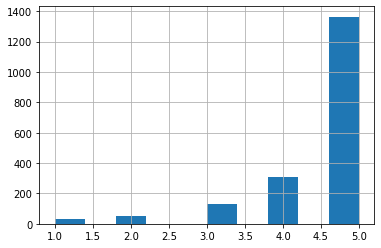

In [ ]:
# 별점 분포
review_data['star'].hist()
plt.show()

In [ ]:
# 별점별 리뷰 빈도
review_data["star"].value_counts()

5    1364
4     309
3     129
2      51
1      34
Name: star, dtype: int64

In [ ]:
# 별점 1~3개 : 부정
# 별점 4~5개 : 긍정
def star_to_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
review_data['label'] = review_data['star'].apply(lambda x: star_to_label(x))

In [ ]:
review_data

,review_spell_check,star,label
0,삼선 볶음밥에 짜장 소스를 넣은 건지 만 건지 너무 조금이길래 아 실수로 이렇게 보...,1,0
1,,5,1
2,머야 이거 너무 맛있잖아요 책임져요,5,1
3,지난번에는 맛있게 먹었는데 이번엔 유린기가 좀 퍽퍽하다고 해야 하나 혹시 주방장님...,3,0
4,간짜장이 떡졌어요 짜장 양념을 너무 모자라게 줘서 면발이 잘 비벼지지도 않고 이런 ...,3,0
...,...,...,...
1897,꺅 치졸 짬뽕 개운함 짜장도 괜찮음,5,1
1898,배달이 조금 느렸지만 무난했어요,4,1
1899,너무 맵지 않게 해달라고 꼭 부탁드렸는데 완전히 부을 짬뽕이 와서 하나도 못 먹고 ...,4,1
1900,항상 제값하는 집 난 진짜 여기서만 시킨다 진심 이 집 괜찮음,5,1


In [ ]:
# 감성별 리뷰 빈도
review_data["label"].value_counts()

1    1673
0     214
Name: label, dtype: int64

1    88.659247
0    11.340753
Name: label, dtype: float64


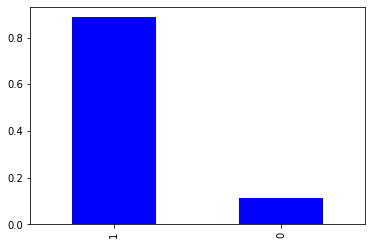

In [ ]:
# 긍정(1) & 부정(0) 비율
review_data["label"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(review_data["label"].value_counts(normalize=True)*100)

- train set & test set 분류

In [ ]:
# feature : tf_idf_vect(리뷰의 형태소와 중요도)
# target : label(별점에 따른 긍/부정)

from sklearn.model_selection import train_test_split

# 트레이닝 데이터, 테스트 데이터 설정
x = tf_idf_vect
y = review_data["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

# 현재 트레이닝 데이터 확인
print("Before Sampling: ",Counter(y_train))

Before Sampling:  Counter({1: 1179, 0: 141})


- 모델 학습(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in train set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.87
precision: 0.87
recall: 1.00
F1: 0.93


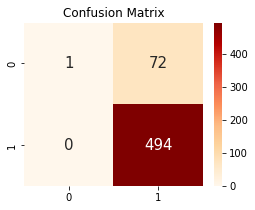

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 샘플링 재조정

In [ ]:
# 과적합(Overfitting)으로 인해 오버 샘플링(Over Sampling)
# OverSampling 방법 - SVMSMOTE

from imblearn.over_sampling import SVMSMOTE
SVMSMOTE = SVMSMOTE()
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE.fit_resample(x_train, y_train)
print("Before Sampling: ",Counter(y_train))
print("After oversampling(SVMSMOTE): ",Counter(y_train_SVMSMOTE))

Before Sampling:  Counter({1: 1179, 0: 141})
After oversampling(SVMSMOTE):  Counter({1: 1179, 0: 1179})


- 모델 재학습

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
y_pred = lr2.predict(x_test)

In [ ]:
# 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.85
precision: 0.90
recall: 0.93
F1: 0.91


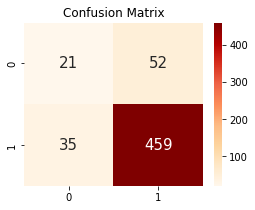

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 적절한 임계값(threshold) 찾기

In [ ]:
proba = lr2.predict_proba(x_test)
y_pred = lr2.predict(x_test)
print(len(y_pred))
print(len(proba))
print(len(proba[0]))

567
567
2


In [ ]:
# 임계값(threshold) 0.55로 설정할 경우

prediction = np.where(proba >= 0.55,1,0)
pred2 = []
for i in prediction:
    pred2.append(i[1])

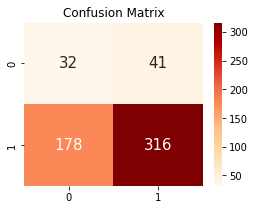

In [ ]:
# confusion matrix
confusion = confusion_matrix(y_true = y_test, y_pred = pred2)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('accuracy:',accuracy_score(y_test,pred2))
print('precision:',precision_score(y_test,pred2))
print('recall:',recall_score(y_test,pred2))
print('f1_score:',f1_score(y_test,pred2))

accuracy: 0.6137566137566137
precision: 0.8851540616246498
recall: 0.6396761133603239
f1_score: 0.7426556991774383


- 교차 검증(Cross Validation)

In [ ]:
# Target Data가 편향되었기 때문에 StratifiedKFold를 통해 교차 검증 실시
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

SK_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
score = cross_val_score(lr2, x_train_SVMSMOTE, y_train_SVMSMOTE, cv=SK_fold)

In [ ]:
print('검증 점수:', score)
print('평균 검증 점수:', round(score.mean(), 4))

검증 점수: [0.81694915 0.81016949 0.79796265 0.81833616]
평균 검증 점수: 0.8109


## (4) 감성분류 - 긍정 & 부정

- 모델로 리뷰 긍정 & 부정 분류




In [ ]:
proba = lr2.predict_proba(x)
y_pred = lr2.predict(x)
print(len(y_pred))
print(len(proba))
print(len(proba[0]))

1887
1887
2


In [ ]:
# 실제값과 예측값 비교
p_list = []
for p in proba:
    p_list.append(p[1])
p_list=np.round(p_list,3)
data=pd.DataFrame({
    '예측 확률':p_list,
    '예측 감성':y_pred,
    '실제 감성':y})
data

,예측 확률,예측 감성,실제 감성
0,0.554,1,0
1,0.543,1,1
2,0.543,1,1
3,0.677,1,0
4,0.297,0,0
...,...,...,...
1897,0.634,1,1
1898,0.878,1,1
1899,0.858,1,1
1900,0.469,0,1


In [ ]:
# 실제 & 예측 분류 데이터 빈도
print("예측 감성:",Counter(y_pred))
print("실제 감성:",Counter(y))

예측 감성: Counter({1: 1684, 0: 203})
실제 감성: Counter({1: 1673, 0: 214})


1    89.242183
0    10.757817
Name: 예측 감성, dtype: float64


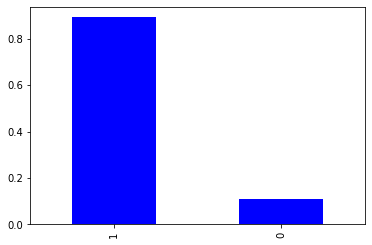

In [ ]:
data["예측 감성"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(data["예측 감성"].value_counts(normalize=True)*100)

1    88.659247
0    11.340753
Name: 실제 감성, dtype: float64


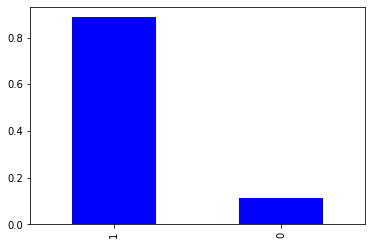

In [ ]:
data["실제 감성"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(data["실제 감성"].value_counts(normalize=True)*100)

## (5) 긍정 & 부정 키워드 분석

- 회귀 계수를 통한 긍정 & 부정 키워드 추출

In [ ]:
# Logistic Regression 모델에서 생성된 회귀계수 값
lr2.coef_

array([[0.39449164, 0.21991263, 0.        , ..., 0.53561685, 0.12316209,
        0.        ]])

<BarContainer object of 1295 artists>

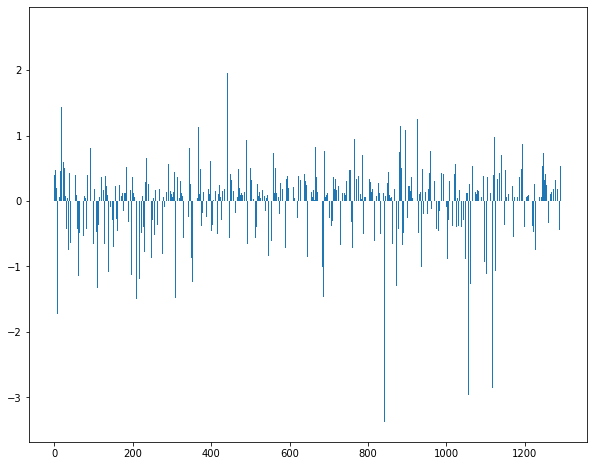

In [ ]:
# 회귀계수 값을 시각화
# 계수가 양인 경우는 긍정, 음인 경우는 부정
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [ ]:
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
# 회귀계수 값 상/하위 5개 정렬
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

[(2.663888657221486, 1112), (2.3794022092694465, 343), (2.086095550826102, 685), (1.9557753836790095, 442), (1.4432778765219856, 18)]
[(-2.0858034612810457, 502), (-2.8567162302634075, 1118), (-2.965993043721694, 1057), (-3.3070576986857843, 460), (-3.3784219438228162, 842)]


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(2.663888657221486, 1112),
 (2.3794022092694465, 343),
 (2.086095550826102, 685),
 (1.9557753836790095, 442),
 (1.4432778765219856, 18),
 (1.3867611112115605, 80),
 (1.377186701008532, 117),
 (1.2473321681071727, 927),
 (1.2155282794712432, 683),
 (1.207375696939126, 1060),
 (1.1885493355893435, 1099),
 (1.176463418191296, 1217),
 (1.153159573683628, 785),
 (1.149881826997882, 778),
 (1.1420279452637556, 883),
 (1.130826246455044, 368),
 (1.0987456532114908, 982),
 (1.0923486698283782, 896),
 (1.0877588905217934, 568),
 (1.0198074163703186, 377),
 (1.0122617114614747, 1020),
 (1.0059743963854864, 1206),
 (0.9822680502713522, 249),
 (0.9736826680465612, 1123),
 (0.9487325714253694, 132),
 (0.9479557293853438, 766),
 (0.9439030783778974, 907),
 (0.9390383205063424, 334),
 (0.9354412452218854, 1081),
 (0.9343725695213692, 490),
 (0.9039431314298164, 382),
 (0.9008819457027951, 361),
 (0.8905667053655926, 116),
 (0.8834655200678845, 1042),
 (0.8727977159938866, 1195),
 (0.8433826264488176

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{546: '삼선',
 473: '볶음밥',
 1055: '짜장',
 577: '소스',
 982: '조금',
 638: '실수',
 933: '저희',
 798: '원래',
 1067: '쪼금',
 1068: '쪼끔',
 175: '나가요',
 962: '정량',
 433: '발뺌',
 559: '생각',
 207: '녹취',
 1032: '지난번',
 839: '이번',
 810: '유린',
 1192: '퍽퍽',
 1217: '하나',
 1267: '혹시',
 439: '방장',
 23: '간짜장',
 684: '양념',
 383: '면발',
 1056: '짜장면',
 1099: '처음',
 236: '달라',
 150: '기본',
 531: '사실',
 467: '보류',
 1174: '통째',
 301: '떡진',
 519: '비비고',
 833: '이건',
 182: '나중',
 15: '가위',
 1141: '칠리',
 557: '새우',
 1178: '튀김',
 957: '점심때',
 432: '발도',
 129: '그대로',
 211: '느낌',
 1041: '직후',
 825: '음식',
 462: '보고',
 1196: '평가',
 552: '상태',
 1112: '최고',
 1166: '탕수육',
 80: '고기',
 1081: '차돌',
 1060: '짬뽕',
 977: '제일',
 444: '배신',
 763: '완공',
 442: '배달',
 202: '노고',
 788: '용품',
 896: '자주',
 678: '애용',
 1001: '주문',
 802: '웬일',
 1254: '행운',
 766: '완전',
 897: '자체',
 410: '뭔가',
 913: '장사',
 61: '건가',
 320: '리뷰',
 677: '애가',
 427: '반절',
 842: '이상',
 739: '영업',
 111: '국물',
 689: '양파',
 1006: '주시',
 927: '쟁반짜장',
 682: '야채',
 6: '가득',
 8

In [ ]:
# 긍정 키워드 5개 출력
for coef in coef_pos_index[:5]:
    print(invert_index_vectorizer[coef[1]], coef[0]) 

최고 2.663888657221486
만두 2.3794022092694465
양도 2.086095550826102
배달 1.9557753836790095
가지 1.4432778765219856


In [ ]:
# 부정 키워드 5개 출력
for coef in coef_neg_index[:5]:
    print(invert_index_vectorizer[coef[1]], coef[0])

이상 -3.3784219438228162
별로 -3.3070576986857843
짜증 -2.965993043721694
최악 -2.8567162302634075
불어 -2.0858034612810457
